In [39]:
import os
import pandas as pd
import numpy as np
home_dir = os.getcwd()
model_folder =  home_dir +'/../../data/model/'
model_path = model_folder + 'pca_model.csv'
media_folder =  home_dir +'/../../media/'

#https://telefonicatech.com/blog/python-para-todos-tutorial-de-pca-en-5

# <span style='color:red'> .<br> </span><span style='color:green'> Análisis de Componentes principales.<br></span><span style='color:blue'> Principal Components Analysis (PCA).<br></span>

In [40]:
#defining dtypes i save 65% of memory.
#Use to checkit sum(list(price.memory_usage()))
model_types = {"Nom_Barri":str,"Any":np.uint16,"Trimestre":np.uint8,"Eur":np.float32,"Eur_m2":np.float32,"Mat":np.uint8,"Tar":np.uint8,"Nit":np.uint8}
#modela = pd.read_csv(model_path)
model = pd.read_csv(model_path, dtype=model_types)
#(sum(list(modela.memory_usage())), sum(list(model.memory_usage())))

In [41]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom_Barri  1802 non-null   object 
 1   Any        1802 non-null   uint16 
 2   Trimestre  1802 non-null   uint8  
 3   Eur        1802 non-null   float32
 4   Eur_m2     1802 non-null   float32
 5   Accidents  1802 non-null   int64  
dtypes: float32(2), int64(1), object(1), uint16(1), uint8(1)
memory usage: 47.6+ KB


<span style='color:red'> Filtrage de dades(tercer trimestre de 2022).<br> </span><span style='color:green'> Filtrado de datos (tercer trimestre de 2022).<br></span><span style='color:blue'> Data filtering (Third quarter of 2022).<br></span>

In [42]:
grouped = model.groupby(["Any", "Trimestre"],group_keys=False)
counted_quarter = grouped.size().unstack()
counted_quarter

Trimestre,1,2,3,4
Any,,,,
2016,66.0,66.0,66.0,66.0
2017,66.0,67.0,67.0,67.0
2018,67.0,67.0,67.0,67.0
2019,67.0,67.0,67.0,67.0
2020,67.0,66.0,67.0,67.0
2021,67.0,67.0,67.0,66.0
2022,67.0,67.0,67.0,NaN


In [43]:
model_mask = (model.Any == 2017) & (model.Trimestre == 3)
data =model[model_mask]
data

,Nom_Barri,Any,Trimestre,Eur,Eur_m2,Accidents
397,el Raval,2017,3,764.849976,13.970000,40
398,el Barri Gòtic,2017,3,1028.489990,14.430000,52
399,la Barceloneta,2017,3,758.179993,19.719999,40
400,"Sant Pere, Santa Caterina i la Ribera",2017,3,927.159973,16.160000,36
401,el Fort Pienc,2017,3,933.539978,13.440000,69
...,...,...,...,...,...,...
459,Diagonal Mar i el Front Marítim del Poblenou,2017,3,1093.339966,16.219999,38
460,el Besòs i el Maresme,2017,3,625.130005,10.030000,20
461,Provençals del Poblenou,2017,3,933.900024,12.640000,44
462,Sant Martí de Provençals,2017,3,776.090027,11.090000,20


### <span style='color:red'> Escalat de les variables<br> </span><span style='color:green'> Escalado de las variables <br></span><span style='color:blue'> Variable scaling <br></span>

In [44]:
#Numeric data starts in 4th column with "Eur"
data.loc[:,data.columns[3]:data.columns[-1]].mean(axis=0)

Eur          860.869080
Eur_m2        13.015971
Accidents     36.358209
dtype: float64

In [45]:
data.loc[:,data.columns[3]:data.columns[-1]].var(axis=0)

Eur          69137.617188
Eur_m2           5.850552
Accidents     1540.506106
dtype: float64

<span style='color:red'> Les diferències entre les mitjanes i les variàncies de les variables suggereixen escalar les variables.<br> </span><span style='color:green'> Las diferencias entre las medias y las varianzas de cada variable sugieren su escalado. <br></span><span style='color:blue'> The differences between the means and variances of the variables suggest scaling the variables. <br></span>

In [46]:
from sklearn.preprocessing import StandardScaler
#Split data set into numeric data and label(barri)
numeric_data=data.loc[:,data.columns[3]:data.columns[-1]]
barris = data.loc[:,"Nom_Barri"].sort_values()
#how many differente barris do we have. 
num_barris = len(barris.unique())
#Data standarization
std_numeric_data = StandardScaler().fit_transform(numeric_data)
#How many variables do we have
num_vars = std_numeric_data.shape[1]

<span style='color:red'> Matriu de covariances i càlcul dels seus vectors i valors propis.<br> </span><span style='color:green'> Matriz de covarianzas y cálculo de sus vectors y valores propios. <br></span><span style='color:blue'> Covariance matrix and calculation of its einge vectors and values. <br></span>

In [47]:
cov_mat=np.cov(std_numeric_data.T)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
[[1.01515152 0.74563746 0.36687742]
 [0.74563746 1.01515152 0.2567634 ]
 [0.36687742 0.2567634  1.01515152]]


In [48]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.65462843 -0.72686921 -0.20766022]
 [-0.62724296  0.6755998  -0.38746764]
 [-0.4219335   0.12339392  0.89819044]]

Eigenvalues 
[1.96606305 0.25982585 0.81956565]


In [49]:
#  List of couples (eingevalue, eingevector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Descendent sorted by eingevalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Total variance inside eingevalues
sum_eig_vals = sum(eig_vals)
acum_perc = 0
# Table showing variance explained by each eingevector
print('num\teingevalue\t\t%\t∑%')
for i, val in enumerate(eig_pairs):
    perc = val[0]/sum_eig_vals
    acum_perc += perc
    print("{}\t{}\t{:.2f}\t{:.2f}".format(i,val[0],perc, acum_perc ))

num	eingevalue		%	∑%
0	1.9660630452735819	0.65	0.65
1	0.8195656493403086	0.27	0.91
2	0.2598258508406559	0.09	1.00


<span style='color:red'> Dos components principals contenen el 89% de la informació.<br> </span><span style='color:green'> Dos componentes principales contiene el 89% de la información. <br></span><span style='color:blue'> Two principal components contain 89% of the information. <br></span>

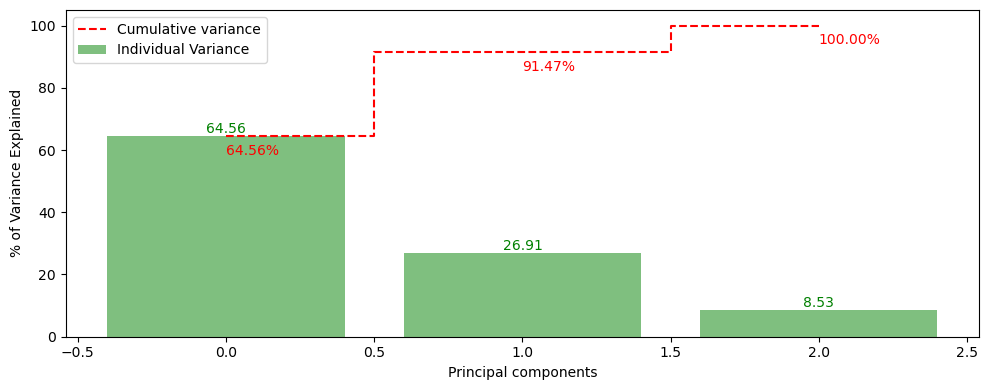

In [50]:
import matplotlib.pyplot as plt
# Chart showing variance explained by each eingevectror
var_exp = [(i / sum_eig_vals)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Bar chart of variance per eingevector & step chart with cumulative variance by eingevector
with plt.style.context('seaborn-v0_8-pastel'):
    plt.figure(figsize=(10, 4))

    p=plt.bar(range(num_vars), var_exp, alpha=0.5, align='center',
            label='Individual Variance', color='g')
    plt.bar_label(p, label_type='edge', fmt='%.2f', color='g')
    plt.step(range(num_vars), cum_var_exp, where='mid', linestyle='--', label='Cumulative variance', color='r')
    [plt.text(i, j-6, f'{j:.2f}%', color='r') for (i, j) in zip(range(num_vars), cum_var_exp)]
    plt.ylabel('% of Variance Explained')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.savefig(media_folder + "EingeValues_variance.png")

<span style='color:red'> Comportament de les variables en els components.(factors de càrrega).<br> </span><span style='color:green'>Comportamiento de las variables en las componentes(coeficientes). <br></span><span style='color:blue'> Behavior of the variables inside the components (loading factors). <br></span>

In [51]:
#Eingevectors with shape 1 x num_vars are reshaped to num_vars x 1. 
#"Vertical" eingevectors are pasted together to form de "proyection Matrix"

matrix_w = np.hstack((eig_pairs[0][1].reshape(num_vars,1),
                      eig_pairs[1][1].reshape(num_vars,1)))
#Load factors visualization
coeficients= zip(list(numeric_data.columns),matrix_w)
print("Var\tPC-x\t PC-y")
for var, pcs in coeficients:
    print("{}\t{:.2f}\t{:6.2f}".format(var, pcs[0], pcs[1] ))


Var	PC-x	 PC-y
Eur	-0.65	 -0.21
Eur_m2	-0.63	 -0.39
Accidents	-0.42	  0.90


<span style='color:red'> Al component principal pesen més els accidents que els preus. Al component segon els preus sumen i els accidents resten.<br> </span><span style='color:green'>En el componente principal pesan más los accidentes que los precios. En el componente segundo los precios suman y los accidentes restan. <br></span><span style='color:blue'> In the main component, accidents weigh more than prices. In the second component, prices add and accidents subtract. <br></span>

In [52]:
#data proyection on new ortogonal axes.
print("full data x matrix  = reduced data")
print(std_numeric_data.shape, "  x",matrix_w.shape, " = ({}, {})".format(std_numeric_data.shape[0],matrix_w.shape[1]))
components = std_numeric_data.dot(matrix_w)

full data x matrix  = reduced data
(67, 3)   x (3, 2)  = (67, 2)


In [53]:
#get min_max from each componente to set axis limits
import math
min_x, max_x = (math.floor(components[:,0].min()), math.ceil(components[:,0].max()))
min_y, max_y = (math.floor(components[:,1].min()), math.ceil(components[:,1].max()))

In [54]:
#generated with http://medialab.github.io/iwanthue/
# Color      one         two        three     four       five       six
#2345678901234567890123456789012345678901234567890123456789012345678901234567890
#        1         2         3         4         5         6         7         8 
# 73 colors

all_colors = ["#e576b7", "#54c34e", "#8458d9", "#93c23c", "#3959cf", "#c5b63b", \
              "#457bed", "#91a936", "#9e42b8", "#489932", "#c83aa2", "#4fce8d", \
              "#e272d8", "#45a867", "#c578e8", "#6c892c", "#8974e4", "#e69c37", \
              "#664db1", "#92bc6c", "#bb2772", "#55cebc", "#e13365", "#3a7a33", \
              "#e84a90", "#367949", "#db3941", "#50c1e3", "#e15d29", "#4a92eb", \
              "#b78629", "#476ac2", "#b35d1f", "#9a8ce4", "#4c6a18", "#8f5cb6", \
              "#90832e", "#6e4996", "#c0b46f", "#9a4190", "#60ad85", "#b12e4b", \
              "#33a29e", "#ab3422", "#3b8dbb", "#de6550", "#3868a9", "#ec8c62", \
              "#5d5ca7", "#695f17", "#d293d6", "#4d662b", "#aa3b6e", "#24765a", \
              "#e25e73", "#699ad9", "#815a16", "#aaa4e3", "#8a4722", "#4a5589", \
              "#d59d6a", "#726da6", "#849357", "#975b9b", "#726c37", "#e2799a", \
              "#9d6b3c", "#bd76a4", "#b0584c", "#8d476f", "#e58c8c", "#8d3f52", \
              "#ae5b6a"]

unsorted_colors = all_colors[:num_barris]
colors = sorted(unsorted_colors)

<Figure size 640x480 with 0 Axes>

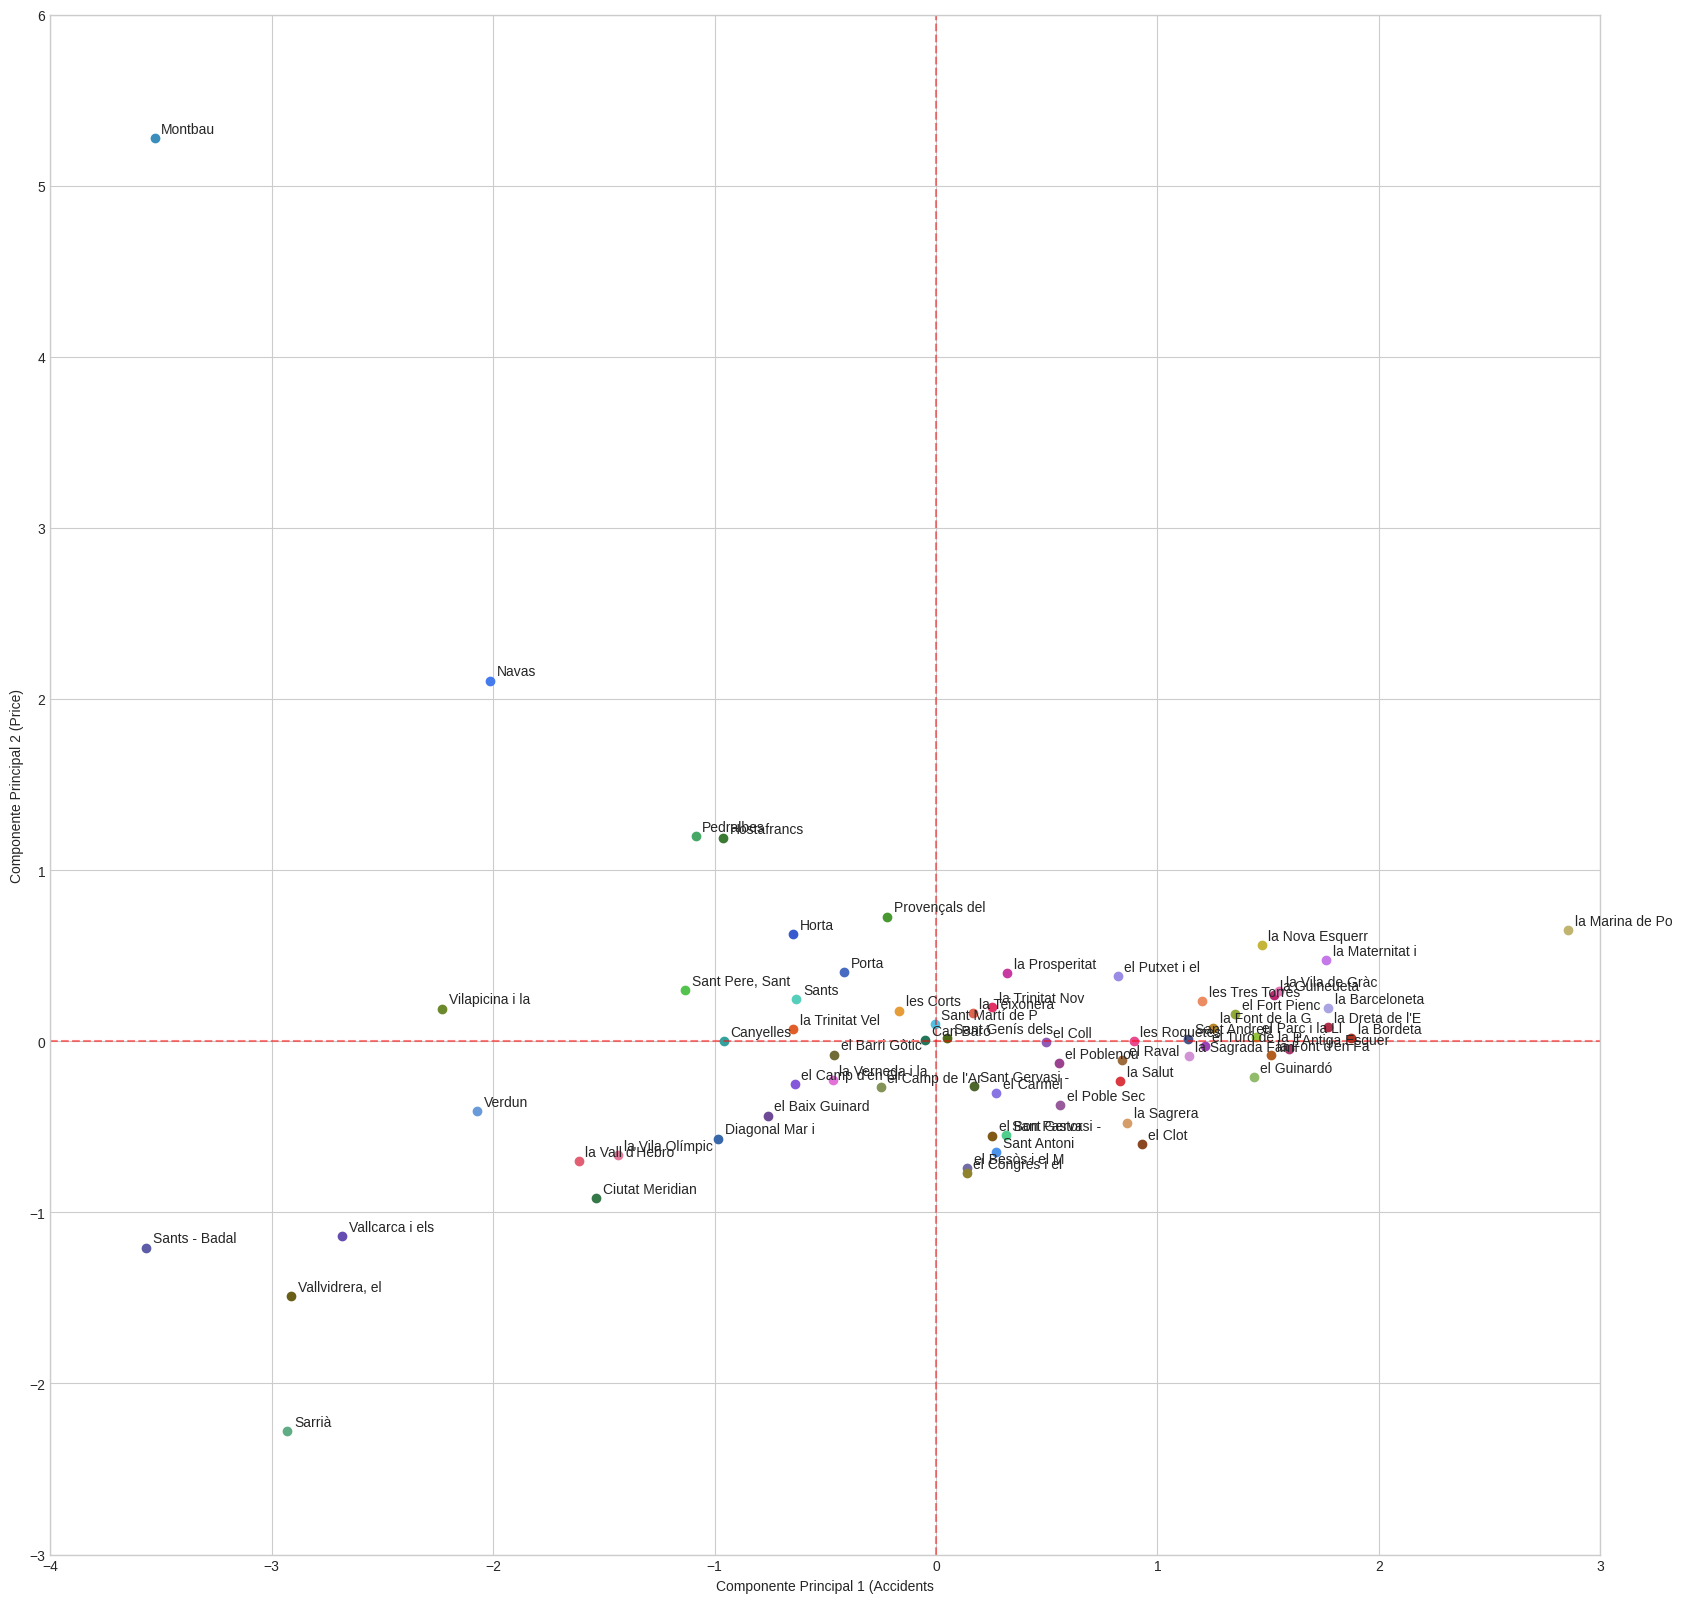

In [55]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig = plt.figure(figsize=(20, 20))
    for lab, col in zip(barris, colors):
        x = components[barris==lab, 0]
        y = components[barris==lab, 1]
        plt.scatter(x, y, label=lab, c=col)
        plt.text(x + 0.03, y + 0.03, lab[:15], fontsize=10)
    plt.xlabel('Componente Principal 1 (Accidents')
    plt.ylabel('Componente Principal 2 (Price)')
    plt.ylim(min_y,max_y)
    plt.xlim(min_x,max_x)
    plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.axhline(y= 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.show()
    fig.savefig(media_folder + "pca_barris.png")

In [56]:
components

array([[-4.78542482e-02,  6.39313821e-03],
       [-9.59341103e-01, -9.51345867e-04],
       [-1.53347119e+00, -9.16346963e-01],
       [-9.83872329e-01, -5.68453473e-01],
       [-6.46630524e-01,  6.26356634e-01],
       [-9.60402505e-01,  1.18579936e+00],
       [-3.52934706e+00,  5.27775578e+00],
       [-2.01274710e+00,  2.10792858e+00],
       [-1.08563041e+00,  1.20063073e+00],
       [-4.15704647e-01,  4.03681463e-01],
       [-2.21061645e-01,  7.28580642e-01],
       [ 1.13874660e+00,  1.53033057e-02],
       [ 2.72688558e-01, -6.48236116e-01],
       [ 5.14619828e-02,  1.78897326e-02],
       [ 1.69934241e-01, -2.62036457e-01],
       [ 3.14125474e-01, -5.49331682e-01],
       [-5.71888750e-03,  9.80735577e-02],
       [-1.13364629e+00,  2.96596499e-01],
       [-6.30036702e-01,  2.48158018e-01],
       [-3.56601727e+00, -1.20545154e+00],
       [-2.93009052e+00, -2.27703157e+00],
       [-2.68252290e+00, -1.13971920e+00],
       [-2.91198351e+00, -1.49093331e+00],
       [-2.